# Introduction

In this lab, we will use the Local Outlier Factor (LOF) algorithm to perform novelty detection. LOF is an unsupervised anomaly detection method that identifies the local density deviation of a given data point with respect to its neighbors. It considers the samples that have a substantially lower density than their neighbors as outliers.

# Import Libraries

We will start by importing the necessary libraries. We will use scikit-learn, numpy, and matplotlib.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

# Generate Data

We will generate some data for training, testing, and outliers using numpy. We will generate 100 normal training observations, 20 normal testing observations, and 20 abnormal novel observations.

In [3]:
np.random.seed(42)

xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
X = 0.3 * np.random.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

# Train the Model

We will now train the LOF model using the training data. We set the number of neighbors to 20 and novelty to true. We also set the contamination to 0.1.

In [4]:
clf = LocalOutlierFactor(n_neighbors=20, novelty=True, contamination=0.1)
clf.fit(X_train)

LocalOutlierFactor(contamination=0.1, novelty=True)

# Evaluate the Model

We will evaluate the trained model on the testing and outlier data. We will use the predict method to predict the labels of the testing and outlier data. We will then count the number of errors in the testing and outlier data.

In [5]:
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

# Visualize the Results

We will visualize the results by plotting the training, testing, and outlier data along with the learned frontier. We will also display the number of errors in the testing and outlier data.

AttributeError: 'QuadContourSet' object has no attribute 'collections'

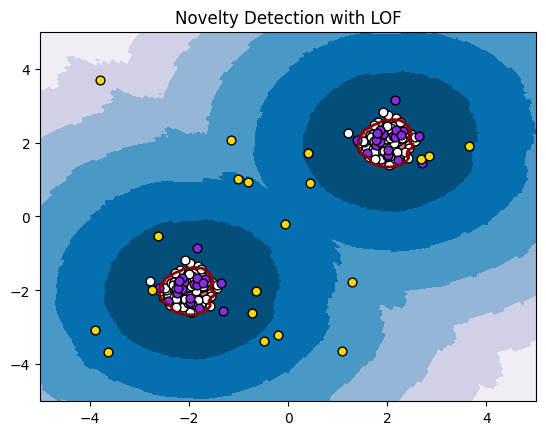

In [6]:
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("Novelty Detection with LOF")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors="darkred")
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors="palevioletred")

s = 40
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c="white", s=s, edgecolors="k")
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c="blueviolet", s=s, edgecolors="k")
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c="gold", s=s, edgecolors="k")
plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend(
    [a.collections[0], b1, b2, c],
    [
        "learned frontier",
        "training observations",
        "new regular observations",
        "new abnormal observations",
    ],
    loc="upper left",
    prop=matplotlib.font_manager.FontProperties(size=11),
)
plt.xlabel(
    "errors novel regular: %d/40 ; errors novel abnormal: %d/40"
    % (n_error_test, n_error_outliers)
)
plt.show()

# Summary

In this lab, we used the Local Outlier Factor (LOF) algorithm to perform novelty detection. We generated data for training, testing, and outliers, trained the LOF model, evaluated the model, and visualized the results.